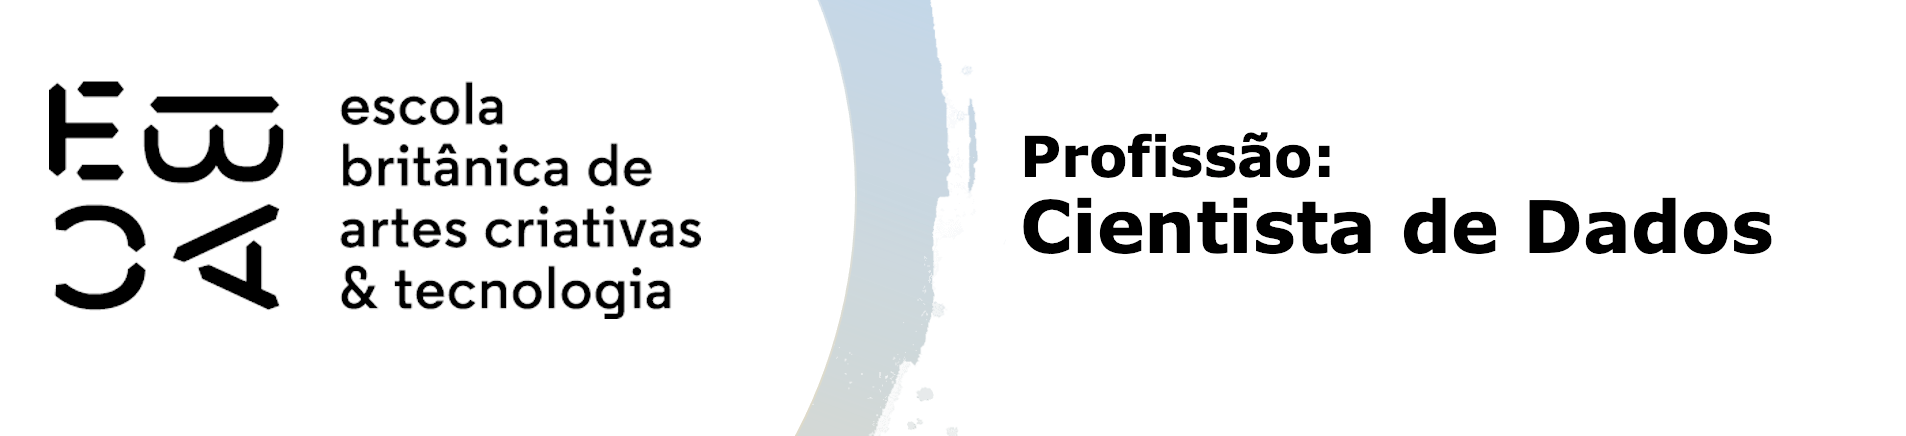

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [5]:
# Carregar a base de dados
caminho_arquivo = 'penguins.csv'
dados_pinguins = pd.read_csv(caminho_arquivo)

# Exibir as primeiras linhas do dataframe
dados_pinguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Exibir as informações do dataframe para identificar as variáveis quantitativas
print(dados_pinguins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None


In [7]:
# Eliminar valores faltantes
dados_pinguins_sem_nulos = dados_pinguins.dropna()

# Exibir as primeiras linhas do dataframe após eliminar valores faltantes
dados_pinguins_sem_nulos.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [8]:
# Verificar novamente as informações do dataframe para confirmar a remoção dos valores faltantes
print(dados_pinguins_sem_nulos.info())

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB
None


In [10]:
# Selecionar as variáveis quantitativas
variaveis_quantitativas = dados_pinguins_sem_nulos[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Inicializar o padronizador
padronizador = StandardScaler()

In [15]:
# Padronizar as variáveis
variaveis_padronizadas = padronizador.fit_transform(variaveis_quantitativas)

# Criar um novo dataframe com as variáveis padronizadas
dados_padronizados = pd.DataFrame(variaveis_padronizadas, columns=variaveis_quantitativas.columns)
dados_padronizados.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


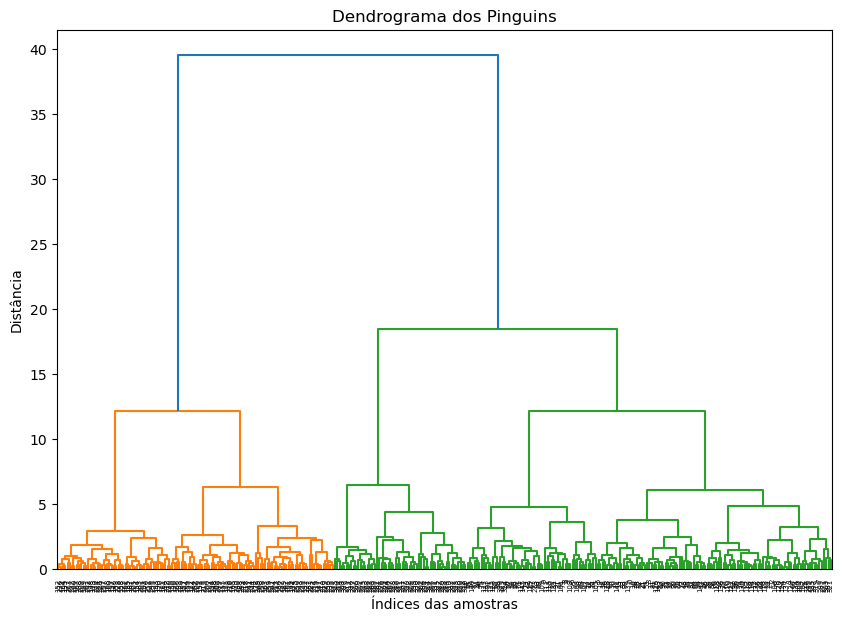

In [16]:
# Plotar o dendrograma para visualizar a formação dos clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrograma dos Pinguins")
dendrograma = shc.dendrogram(shc.linkage(variaveis_padronizadas, method='ward'))
plt.xlabel("Índices das amostras")
plt.ylabel("Distância")
plt.show()

In [18]:
# Realizar o agrupamento hierárquico com 3 grupos
agrupamento_hierarquico = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
grupos = agrupamento_hierarquico.fit_predict(variaveis_padronizadas)

dados_pinguins_sem_nulos['Grupo'] = grupos

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_4704\4166892947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pinguins_sem_nulos['Grupo'] = grupos


In [19]:
dados_pinguins_sem_nulos.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Grupo
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1


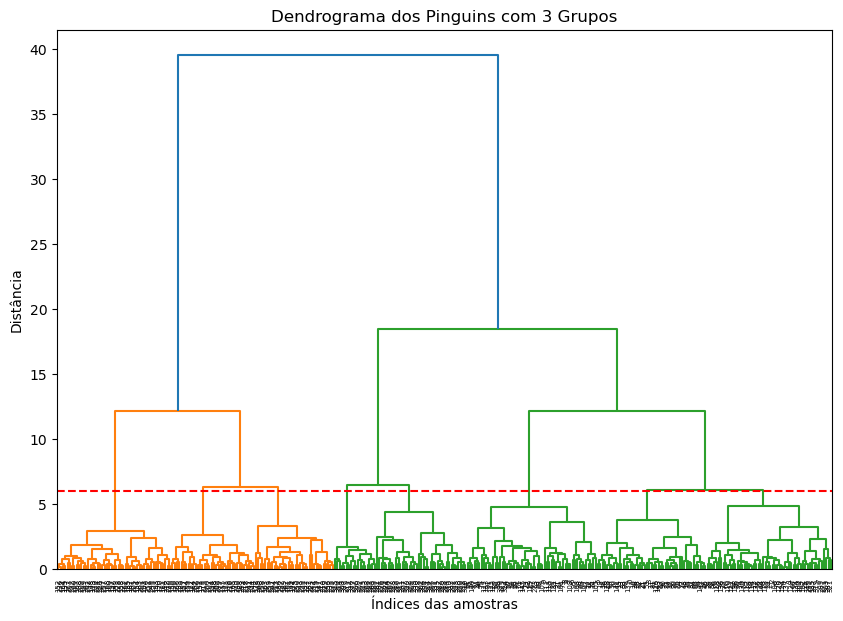

In [20]:
# Plotar o dendrograma com o corte para 3 grupos
plt.figure(figsize=(10, 7))
plt.title("Dendrograma dos Pinguins com 3 Grupos")
dendrograma = shc.dendrogram(shc.linkage(variaveis_padronizadas, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.xlabel("Índices das amostras")
plt.ylabel("Distância")
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [22]:
contagem_especies_por_grupo = dados_pinguins_sem_nulos.groupby(['Grupo', 'species']).size().unstack(fill_value=0)
contagem_especies_por_grupo

species,Adelie,Chinstrap,Gentoo
Grupo,,,
0,0,0,119
1,146,11,0
2,0,57,0


In [23]:
descricao_por_grupo = dados_pinguins_sem_nulos.groupby('Grupo')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()
descricao_por_grupo

bill_length_mm                                                      \
               count       mean       std   min    25%   50%   75%   max   
Grupo                                                                      
0              119.0  47.568067  3.106116  40.9  45.35  47.4  49.6  59.6   
1              157.0  39.191720  2.939670  32.1  37.00  39.1  41.1  46.9   
2               57.0  49.752632  2.710107  45.2  47.50  50.2  51.3  58.0   

      bill_depth_mm             ... flipper_length_mm        body_mass_g  \
              count       mean  ...               75%    max       count   
Grupo                           ...                                        
0             119.0  14.996639  ...             221.5  231.0       119.0   
1             157.0  18.286624  ...             195.0  210.0       157.0   
2              57.0  18.601754  ...             201.0  212.0        57.0   

                                                                        
              mean         std     min     25%     50%     75%     max  
Grupo                                                                   
0      5092.436975  501.476154  3950.0  4700.0  5050.0  5500.0  6300.0  
1      3680.095541  462.120763  2700.0  3350.0  3625.0  3975.0  4775.0  
2      3810.087719  338.255096  3250.0  3600.0  3775.0  4000.0  4800.0  

[3 rows x 32 columns]

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

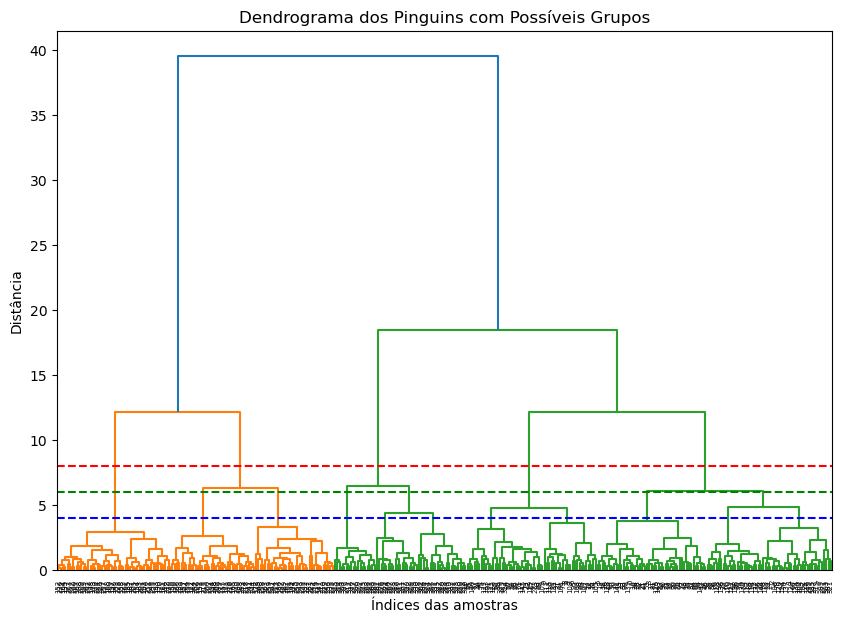

In [24]:
# Plotar o dendrograma para identificar possíveis grupos
plt.figure(figsize=(10, 7))
plt.title("Dendrograma dos Pinguins com Possíveis Grupos")
dendrograma = shc.dendrogram(shc.linkage(variaveis_padronizadas, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')  # Adicionando linha para possível corte
plt.axhline(y=6, color='g', linestyle='--')  # Adicionando linha para possível corte
plt.axhline(y=4, color='b', linestyle='--')  # Adicionando linha para possível corte
plt.xlabel("Índices das amostras")
plt.ylabel("Distância")
plt.show()

4 grupos: A linha verde em aproximadamente 6 sugere 4 grupos.

5 grupos: A linha azul em aproximadamente 4 sugere 5 grupos.

6 grupos: A linha vermelha em aproximadamente 8 sugere 6 grupos.

In [25]:
# Realizar o agrupamento hierárquico com 5 grupos
agrupamento_hierarquico_5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
grupos_5 = agrupamento_hierarquico_5.fit_predict(variaveis_padronizadas)

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
# Adicionar os grupos ao dataframe original
dados_pinguins_sem_nulos['Grupo_5'] = grupos_5
dados_pinguins_sem_nulos.head()


C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_4704\2597223476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pinguins_sem_nulos['Grupo_5'] = grupos_5


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Grupo,Grupo_5
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,2
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1,2
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1,2
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1,2
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1,4


In [27]:
# Contar o número de pinguins de cada espécie em cada grupo
contagem_especies_por_grupo_5 = dados_pinguins_sem_nulos.groupby(['Grupo_5', 'species']).size().unstack(fill_value=0)
contagem_especies_por_grupo_5

species,Adelie,Chinstrap,Gentoo
Grupo_5,,,
0,0,57,0
1,0,0,70
2,93,8,0
3,0,0,49
4,53,3,0


In [29]:
# Contar o número de pinguins de cada espécie e sexo em cada grupo
contagem_especies_sexo_por_grupo_5 = dados_pinguins_sem_nulos.groupby(['Grupo_5', 'species', 'sex']).size().unstack(fill_value=0)
contagem_especies_sexo_por_grupo_5

sex                female  male
Grupo_5 species                
0       Chinstrap      23    34
1       Gentoo          9    61
2       Adelie         72    21
        Chinstrap       8     0
3       Gentoo         49     0
4       Adelie          1    52
        Chinstrap       3     0

Diferenças por Espécie: O agrupamento separa as espécies de maneira bastante clara, especialmente os Gentoo e Chinstrap.

Características Morfométricas: As medidas de comprimento e profundidade do bico, comprimento da nadadeira e massa corporal parecem ser fortes indicadores para a formação dos grupos.